#  Abdul Basit_DSC540_Project_Milestone_5

File: Abdul Basit_DSC540_Project_Milestone_5.ipynb
Name: Abdul Basit
Date: 05/30/2020
Course: DSC 540 Data Preparation
Title: Club Soccer Prediction Analysis

## Club Soccer Prediction Analysis

Merging the Data and Storing in a Database/Visualizing Data

Create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source.

In [1]:
from __future__ import print_function, division
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from sklearn import preprocessing

import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import string
import os
import numpy as np
import sys
import math
import scipy.stats
import density
import random
import hypothesis
import scatter
import requests
import re, string
import random
import sklearn
import twitter
import urllib.request, urllib.parse, urllib.error
import json
import copy
import io
import datetime

from pandas import DataFrame
from urllib.error import HTTPError,URLError
from pandas import DataFrame
from urllib.request import urlopen as uReq
from requests import get
from prettytable import PrettyTable

import sqlite3

!apt-get update
!apt-get install -y default-jdk
!pip install tabula-py xlrd lxml
!pip install Textblob
!pip install -r requirements.txt
!pip install virtualenv
!apt-get update
!apt-get install -y default-jdk
!pip install tabula-py xlrd lxml
!pip install plotly
!pip install cufflinks
!pip install PTable

py.init_notebook_mode(connected=True)

C:\Users\basiab1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


  Using cached https://files.pythonhosted.org/packages/bb/ac/485df0ecb15aa6fec1991945dc0cabfeb724a64f6729e34bab3c6a766813/matplotlib-1.4.3.tar.gz
    Complete output from command python setup.py egg_info:
    Edit setup.cfg to change the build options
    
    BUILDING MATPLOTLIB
                matplotlib: yes [1.4.3]
                    python: yes [3.7.1 (default, Oct 28 2018, 08:39:03) [MSC
                            v.1912 64 bit (AMD64)]]
                  platform: yes [win32]
    
    REQUIRED DEPENDENCIES AND EXTENSIONS
                     numpy: yes [version 1.15.4]
                       six: yes [using six version 1.11.0]
                  dateutil: yes [using dateutil version 2.7.5]
                      pytz: yes [using pytz version 2018.7]
                   tornado: yes [using tornado version 5.1.1]
                 pyparsing: yes [using pyparsing version 2.3.0]
                     pycxx: yes [Official versions of PyCXX are not compatible
                            

Command "python setup.py egg_info" failed with error code 1 in C:\Users\basiab1\AppData\Local\Temp\pip-install-0gmoxr7u\matplotlib\


'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


### Create a database in Python using sqlite3

In [2]:
conn = sqlite3.connect('Soccer_Prediction_Milestone5.db')

In [3]:
c = conn.cursor()

In [4]:
c.execute('''
    CREATE TABLE SPIMATCHES (
	"date"	TEXT,
	"league_id"	INTEGER,
	"team1"	TEXT,
	"team2"	TEXT,
	"spi1"	REAL,
	"spi2"	REAL,
	"prob1"	REAL,
	"prob2"	REAL,
	"probtie"	REAL,
	"proj_score1"	REAL,
	"proj_score2"	REAL,
	"importance1"	REAL,
	"importance2"	REAL,
	"score1"	INTEGER,
	"score2"	INTEGER,
	"xg1"	REAL,
	"xg2"	REAL,
	"nsxg1"	REAL,
	"nsxg2"	REAL,
	"adj_score1"	REAL,
	"adj_score2"	REAL
)''')

In [5]:
conn.commit()

In [6]:
df = pd.read_csv(r'spi_matches.csv')

In [7]:
spi_read.to_sql('SPIMATCHES', conn, if_exists='append', index = False)

In [8]:
df

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34575,2020-12-06,2105,Brasileiro Série A,São Paulo,Flamengo,58.05,73.73,0.3274,0.4304,0.2423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34576,2020-12-06,2105,Brasileiro Série A,Bahía,Santos,48.12,61.02,0.3586,0.3800,0.2614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34577,2020-12-06,2105,Brasileiro Série A,Fluminense,Fortaleza,50.90,45.02,0.5550,0.2097,0.2353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34578,2020-12-06,2105,Brasileiro Série A,Atletico Mineiro,Palmeiras,51.72,67.88,0.3232,0.4297,0.2472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


The data saved the score from each game (team1 vs team2), and some historical data of each team. SPI stands for Soccer Power Index, score1 and score2 are the scores of the game.

In [10]:
# How many rows and how many columns are in my dataframe?

df.shape

(34580, 22)

In [11]:
# Since the data has 34580 records (it's still updating so the data size may change), so I would start from one team, 
# for example Juventus (an Italian league team).

J_df = df[df['team1']=='Juventus']

In [12]:
J_df.shape

(97, 22)

In [14]:
J_df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
40,2016-08-20,1854,Italy Serie A,Juventus,Fiorentina,82.79,69.19,0.6808,0.1010,0.2182,...,79.1,60.5,2.0,1.0,1.53,0.23,1.81,0.69,2.10,1.05
127,2016-09-10,1854,Italy Serie A,Juventus,Sassuolo,83.18,59.69,0.7988,0.0400,0.1612,...,98.5,29.2,3.0,1.0,3.34,0.78,2.54,0.74,3.15,1.05
167,2016-09-14,1818,UEFA Champions League,Juventus,Sevilla FC,83.47,78.92,0.6447,0.1335,0.2217,...,NaN,NaN,0.0,0.0,1.40,0.07,2.11,0.25,0.00,0.00
248,2016-09-21,1854,Italy Serie A,Juventus,Cagliari,82.43,58.24,0.8095,0.0391,0.1514,...,NaN,NaN,4.0,0.0,3.32,0.11,1.90,0.30,3.86,0.00
403,2016-10-15,1854,Italy Serie A,Juventus,Udinese,86.66,51.86,0.8759,0.0220,0.1021,...,81.6,33.2,2.0,1.0,2.52,0.29,1.33,0.58,2.10,1.05


In [15]:
# Apply filter for the fields that I am interested in, which is team SPI during that specific date and the score of that specific game.

df1 = J_df[['date','league','team1','team2','spi1','spi2','score1','score2']]
df1.shape

(97, 8)

### Identify bad data

In [16]:
# Check last few rows of the data

df1.tail()

,date,league,team1,team2,spi1,spi2,score1,score2
31403,2020-04-04,Italy Serie A,Juventus,Torino,84.28,54.27,NaN,NaN
31923,2020-04-19,Italy Serie A,Juventus,Atalanta,84.28,82.78,NaN,NaN
32211,2020-04-26,Italy Serie A,Juventus,Lazio,84.28,76.44,NaN,NaN
32658,2020-05-10,Italy Serie A,Juventus,Sampdoria,84.28,62.05,NaN,NaN
33035,2020-05-24,Italy Serie A,Juventus,AS Roma,84.28,75.15,NaN,NaN


It shows some missing values. These are match fixtures happening in future dates so there are no scores yet. Those data points need to be removed.

In [17]:
# Drop N/As

df1 = df1.dropna()
df1.shape

(90, 8)

### Format data into a more readable form

In [18]:
# Check the format of data, sometimes the date is not in the format we want. It needs to be transformed.

df1.dtypes

date       object
league     object
team1      object
team2      object
spi1      float64
spi2      float64
score1    float64
score2    float64
dtype: object

In [19]:
df1['date'] = pd.to_datetime(df1['date'])

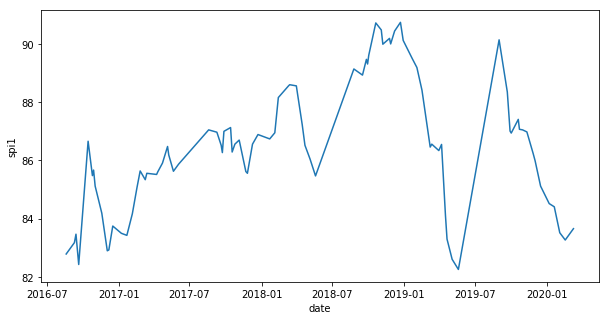

In [20]:
# Plot the Juventus Soccor Power Index over time

plt.figure(figsize=(10,5))
sns.lineplot(data=df1, x="date", y="spi1")
plt.show()

The drop on May 2019 is becasue Juventus lost the game with Ajax in UEFA Champion League, and another two draws with Torino and Atalanta. And there's no updates between June and August since there's no game.

### Conduct Fuzzy Matching

In [21]:
# Plot the spi score of couple top teams. Here I only selected Juventus, Liverpool, Barcelona, and Bayern Munich. There are
# couple other top clubs with great performance, since it's just for a simple illustration so I won't cover all of them.

df2 = df[df['team1'].isin(['Juventus','Liverpool','Barcelona','Bayern Munich'])]

In [22]:
# Clean the data

df2 = df2[['date','league','team1','team2','spi1','spi2','score1','score2']]
df2 = df2.dropna()
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2[df2['date']>'2016-09-01']
df2.shape

(348, 8)

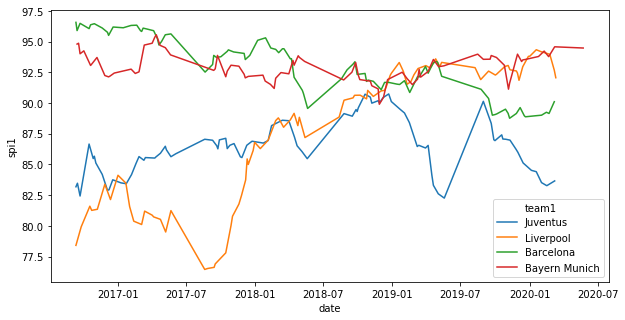

In [23]:
# Plot the performance of the top teams

plt.figure(figsize=(10,5))
sns.lineplot(data=df2, x="date", y="spi1", hue='team1')
plt.show()

Some Inferences so far:
    1) Huge improvement observed for Liverpool during 2018 and consistency through 2020
    2) Bayern Munich showing consistent performance
    3) Barcelona performance has declined since 2017
    4) Juventus has too much variations in their performance, specially since 2019

Next let's take a look at Italy Serie A, which is the 4th soccer in the Europe.

In [24]:
df_I = df[df['league']=='Italy Serie A']
df_I = df_I[df_I['date']>'2017-07-01']
df_I = df_I[['date','team1','team2','spi1','spi2','score1','score2']]

In [25]:
df_I.head()

,date,team1,team2,spi1,spi2,score1,score2
3315,2017-08-19,Juventus,Cagliari,87.05,57.81,3.0,0.0
3343,2017-08-19,Verona,Napoli,46.39,81.53,1.0,3.0
3396,2017-08-20,Atalanta,AS Roma,70.13,81.61,0.0,1.0
3409,2017-08-20,Internazionale,Fiorentina,77.03,65.92,3.0,0.0
3410,2017-08-20,Bologna,Torino,55.51,63.50,1.0,1.0


In [26]:
df_I.shape

(1140, 7)

In [27]:
# Select the goal and goal lost for each team, rename the columns and stack them together.
df_I1 = df_I[['date','team1','score1','score2']]
df_I2 = df_I[['date','team2','score2','score1']]
df_I1.columns=['date','team','offense','defense']
df_I2.columns=['date','team','offense','defense']

In [28]:
frames = [df_I1,df_I2]
df_I3=pd.concat(frames)
df_I3.shape

(2280, 4)

In [29]:
# Calculate a simple offense and defense index for each team.
df_score = df_I3.groupby(['team'],as_index=False).mean()

In [30]:
df_score

,team,offense,defense
0,AC Milan,1.362745,1.098039
1,AS Roma,1.745098,1.088235
2,Atalanta,2.019802,1.178218
3,Benevento,0.868421,2.210526
4,Bologna,1.235294,1.470588
5,Brescia,0.846154,1.884615
6,Cagliari,1.089109,1.534653
7,Chievo Verona,0.802632,1.763158
8,Crotone,1.052632,1.736842
9,Empoli,1.342105,1.842105


I want to put them into a scatterplot, so I want to fit them into a reasonable range. I will start with standarizing.
I also multiplied defense index with -1, I want to makse sure the higher score means better performance.

In [31]:
df_score[['offense', 'defense']] = preprocessing.StandardScaler().fit_transform(df_score[['offense', 'defense']])
df_score['defense'] = df_score['defense']*(-1)

In [32]:
df_score

,team,offense,defense
0,AC Milan,0.163698,1.023185
1,AS Roma,1.159624,1.050089
2,Atalanta,1.875153,0.803159
3,Benevento,-1.123882,-2.029706
4,Bologna,-0.168277,0.000835
5,Brescia,-1.181882,-1.135340
6,Cagliari,-0.549050,-0.174973
7,Chievo Verona,-1.295246,-0.802036
8,Crotone,-0.644063,-0.729820
9,Empoli,0.109937,-1.018683


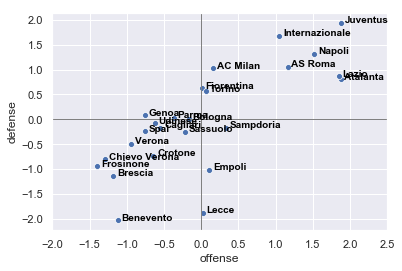

In [33]:
sns.set()
ax = sns.scatterplot(x="offense", y="defense", data=df_score)
ax.axhline(y=0, color='grey', linewidth=1)
ax.axvline(x=0, color='grey', linewidth=1)
ax.set_xlim(-2,2.5)
for line in range(0,df_score.shape[0]):
     ax.text(df_score.offense[line]+0.05, df_score.defense[line], 
             df_score.team[line], horizontalalignment='left', size='small', color='black', weight='semibold')

Teams like Juventus, Internazionale (Inter Milan), and Napoli has the best performance on both offense and defense. On the other hand Benevento, Lecce, Frosinone have a worse performance on both. Team like Sampdoria and Empoli are better on offense than defense, while Bologna and Genoa has better defense than offense.